In [105]:
# Load datasets

from tensorflow.keras.utils import image_dataset_from_directory

data_dir = "dataset/"

test_ds, train_ds, valid_ds = [
    image_dataset_from_directory(
        directory=f"{data_dir}{ds_name}",
        labels="inferred",
        label_mode="categorical", 
        image_size=(128, 128),
        batch_size=64,
    )
    for ds_name in [ "test", "train", "validation" ]
]


Found 359 files belonging to 36 classes.
Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [106]:
from tensorflow import keras

# Augument images

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal_and_vertical'),
    keras.layers.RandomRotation(0.2),
])


In [107]:
# Buffer and prefetch images

train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [108]:
# Define model

from tensorflow.keras.applications import ResNet50
from keras import Sequential

res50 = ResNet50(include_top=False, weights = 'imagenet', input_shape=(128, 128, 3))
res50.trainable = False

model = Sequential()
model.add(res50)
model.add(layers.Flatten())
model.add(layers.Activation('relu'))
model.add(layers.Dense(36))
model.add(layers.Activation('softmax'))


model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 activation_8 (Activation)   (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 36)                1179684   
                                                                 
 activation_9 (Activation)   (None, 36)                0         
                                                                 
Total params: 24,767,396
Trainable params: 1,179,684
Non-trainable params: 23,587,712
_________________________________________________________________


In [109]:
# Compile the model

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [112]:
# Disable irrelevant image parsing warnings for PNG

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
tf.compat.v1.logging.set_verbosity(
    tf.compat.v1.logging.ERROR
)


In [113]:
# Fit the model

from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_ds,
    batch_size=64,
    epochs=15,
    validation_data=valid_ds,
    callbacks=[
        EarlyStopping(
            monitor='val_accuracy',
            patience=3
        )
    ]
)


Epoch 1/15


2022-05-07 18:58:38.151070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-07 18:58:40.952415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/49 [..............................] - ETA: 4:33 - loss: 7.3607 - accuracy: 0.0781

2022-05-07 18:58:41.800754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/49 [==>...........................] - ETA: 36s - loss: 12.5127 - accuracy: 0.1641

2022-05-07 18:58:45.583942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-07 18:58:45.594224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/49 [===>..........................] - ETA: 35s - loss: 12.4802 - accuracy: 0.1741

2022-05-07 18:58:46.668089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/49 [===>..........................] - ETA: 34s - loss: 12.5060 - accuracy: 0.1875

2022-05-07 18:58:47.161985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-07 18:58:47.415709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/49 [=====>........................] - ETA: 31s - loss: 12.1597 - accuracy: 0.2301

2022-05-07 18:58:49.674843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/49 [======>.......................] - ETA: 30s - loss: 12.1394 - accuracy: 0.2409

2022-05-07 18:58:50.825437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-07 18:58:51.079195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-07 18:58:51.187617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/49 [========>.....................] - ETA: 29s - loss: 11.5873 - accuracy: 0.2802

2022-05-07 18:58:53.345726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/49 [=========>....................] - ETA: 27s - loss: 11.0201 - accuracy: 0.3033

2022-05-07 18:58:55.089761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/49 [=============>................] - ETA: 22s - loss: 9.9806 - accuracy: 0.3471 

2022-05-07 18:59:00.120340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/49 [==============>...............] - ETA: 20s - loss: 9.6217 - accuracy: 0.3644

2022-05-07 18:59:02.399872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/49 [===============>..............] - ETA: 18s - loss: 9.3211 - accuracy: 0.3814

2022-05-07 18:59:03.767733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/49 [================>.............] - ETA: 18s - loss: 9.2473 - accuracy: 0.3823

2022-05-07 18:59:04.676295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/49 [=================>............] - ETA: 16s - loss: 8.9764 - accuracy: 0.3979

2022-05-07 18:59:06.978639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/49 [===================>..........] - ETA: 13s - loss: 8.6337 - accuracy: 0.4095

2022-05-07 18:59:10.743449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/49 [=====================>........] - ETA: 11s - loss: 8.5019 - accuracy: 0.4180

2022-05-07 18:59:12.676364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-07 18:59:12.900742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/49 [=====================>........] - ETA: 10s - loss: 8.4481 - accuracy: 0.4215

2022-05-07 18:59:13.757534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/49 [==============================] - 51s 953ms/step - loss: 7.8121 - accuracy: 0.4523 - val_loss: 1.0071 - val_accuracy: 0.8746
Epoch 2/15
49/49 [==============================] - 43s 877ms/step - loss: 1.3872 - accuracy: 0.8523 - val_loss: 0.6786 - val_accuracy: 0.9373
Epoch 3/15
49/49 [==============================] - 43s 875ms/step - loss: 0.6878 - accuracy: 0.9217 - val_loss: 0.8404 - val_accuracy: 0.9345
Epoch 4/15
49/49 [==============================] - 44s 898ms/step - loss: 0.4880 - accuracy: 0.9422 - val_loss: 0.7618 - val_accuracy: 0.9373
Epoch 5/15
49/49 [==============================] - 44s 902ms/step - loss: 0.4811 - accuracy: 0.9576 - val_loss: 0.7645 - val_accuracy: 0.9430
Epoch 6/15
49/49 [==============================] - 49s 1s/step - loss: 0.3866 - accuracy: 0.9685 - val_loss: 0.9116 - val_accuracy: 0.9430
Epoch 7/15
49/49 [==============================] - 46s 934ms/step - loss: 0.4232 - accuracy: 0.9660 - val_loss: 0.7736 - val_accuracy: 0.9544
Epoch 8/15
49

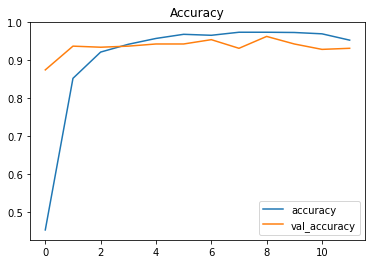

In [114]:
# Check training accuracy over time

import pandas as pd

pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [115]:
# Evaluate the model

model.evaluate(valid_ds, verbose=1)

6/6 [==============================] - 4s 598ms/step - loss: 1.2479 - accuracy: 0.9316


[1.2478591203689575, 0.9316239356994629]

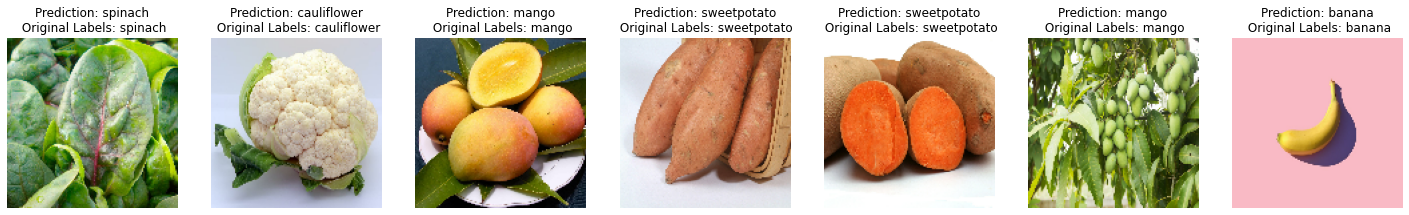

In [126]:
test_labels = test_ds.class_names

plt.figure(figsize=(25,30))

for image, label in train_ds.take(1):
    prediction = model.predict(image)

    for i in range(7):
        plt.subplot(1, 7, i+1)
        plt.imshow(image[i].numpy().astype('int'))
        
        plt.title(f"Prediction: {test_labels[tf.argmax(tf.round(model_prediction[i]))]}\n Original Labels: {test_labels[tf.argmax(label[i])]}")
        plt.grid(True)
        plt.axis('off')
        
    plt.show()